<a href="https://colab.research.google.com/github/muhamadsaepulrizal/UAS-KecerdasanBuatan/blob/main/notebook_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import library

In [1]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

load dataset

In [2]:
dp = "/content/drive/MyDrive/UAS-KecerdasanBuatan/heart_disease_data.csv"

In [4]:
df = pd.read_csv(dp)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,0,130,256,1,0,150,1,0.0,2,2,3,0
1,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
2,44,0,2,118,242,0,1,149,0,0.3,1,1,2,1
3,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
4,56,1,3,120,193,0,0,162,0,1.9,1,0,3,1


histogram & barchart

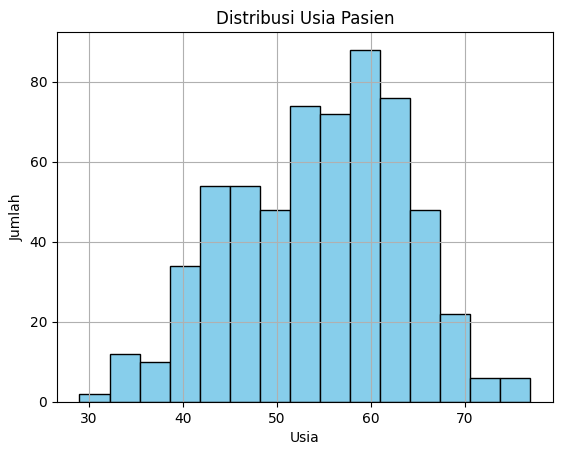

In [15]:
# Histogram: Distribusi Usia
df["age"].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title("Distribusi Usia Pasien")
plt.xlabel("Usia")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

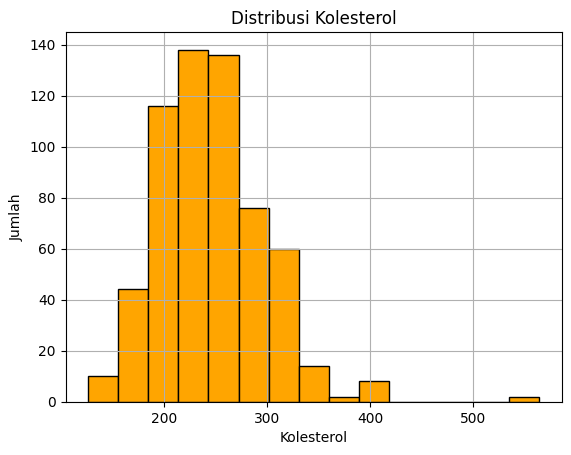

In [16]:
# Histogram: Distribusi Kolesterol
df["chol"].plot(kind='hist', bins=15, color='orange', edgecolor='black')
plt.title("Distribusi Kolesterol")
plt.xlabel("Kolesterol")
plt.ylabel("Jumlah")
plt.grid(True)
plt.show()

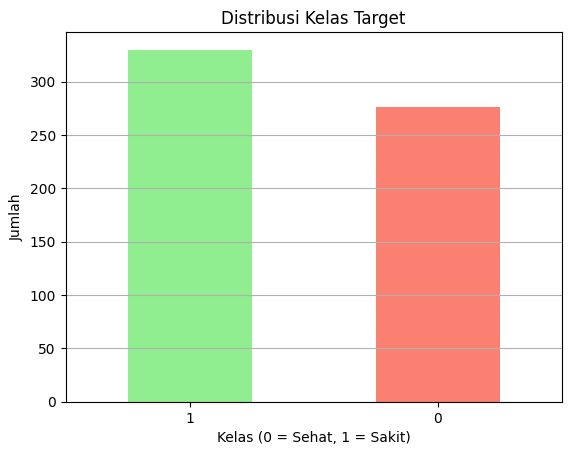

In [17]:
# Bar Chart: Distribusi Kelas Target
df["target"].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas (0 = Sehat, 1 = Sakit)")
plt.ylabel("Jumlah")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

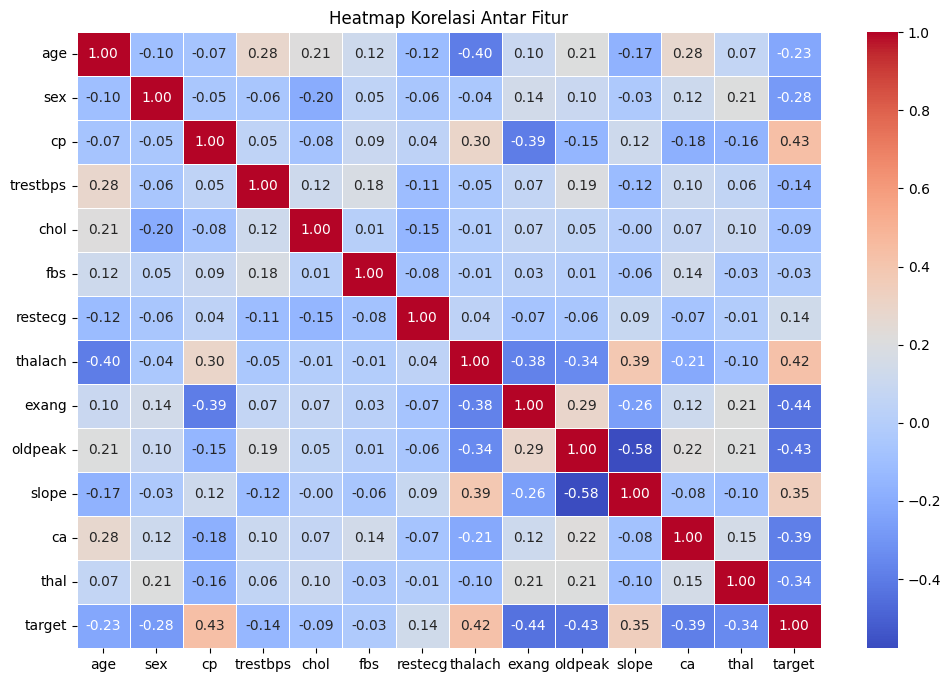

In [18]:
#heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

 DATA PREPARATION

In [5]:
# a. Handling missing values
print("Missing Value Check:")
print(df.isnull().sum())

Missing Value Check:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
# b. Encoding kategorikal (jika ada)
# Data sudah numerik → skip
df_encoded = pd.get_dummies(df)  # tetap gunakan untuk amannya

In [7]:
# c. Normalisasi
X = df_encoded.drop("target", axis=1)
y = df_encoded["target"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# d. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

modelling

In [9]:
# Tuning model Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}


evaluation

In [10]:
# Prediksi
y_pred = best_model.predict(X_test)

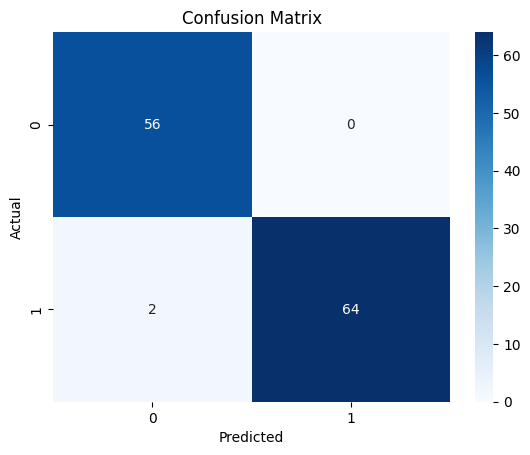

In [11]:
# a. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# b. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        56
           1       1.00      0.97      0.98        66

    accuracy                           0.98       122
   macro avg       0.98      0.98      0.98       122
weighted avg       0.98      0.98      0.98       122



In [13]:
# c. Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

Accuracy: 0.9836


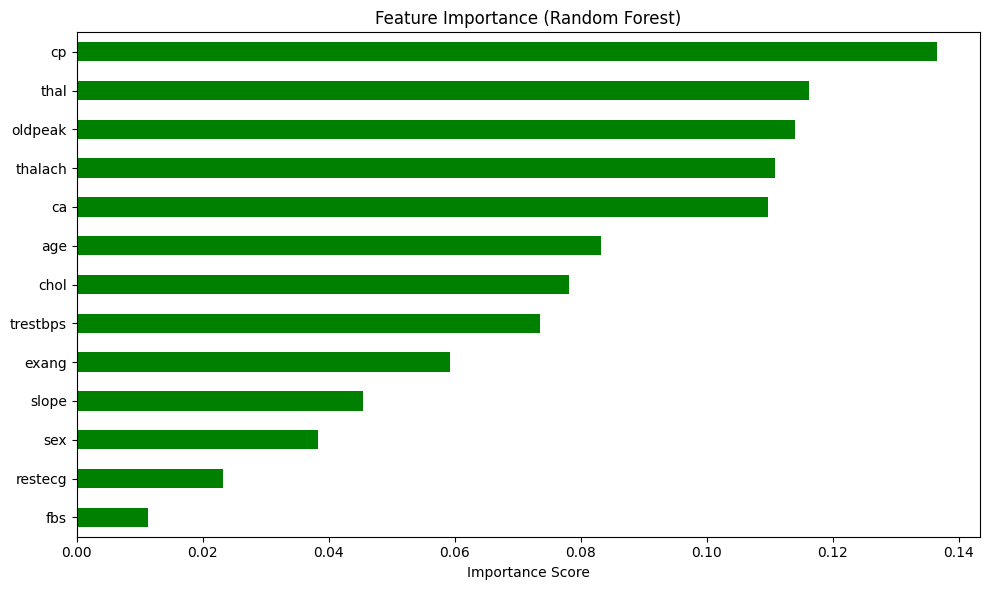

In [14]:
# a. Feature Importance
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', figsize=(10, 6), color='green')
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()